# Hybrid Lagrangian bias expansion with baryons
### - Apply bcm and compare the 15 operators of the lbias model -

Project idea:
- apply bcm to a simulation
- measure 15 terms of lbias before and after baryonification
- does bcm change mostly $P_{11}$ or all terms?
- create galaxy mock catalogue
- can $b_{\nabla}$ absorb all baryon effects? or we need to use the baryonified $P_{11}$? or all baryonified terms?

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import bacco

# Load sim

In [65]:
basedir = '/dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/'
halo_file = 'groups_000/fof_subhalo_history_tab_orph_wweight_000'
atarget = 1
sim = bacco.Simulation(basedir=basedir, halo_file=halo_file, closest_expfactor=atarget)
print(sim.Cosmology)

2024-02-01 20:54:14,186 bacco.sims : Initialising simulation Default
2024-02-01 20:54:14,187 bacco.sims : try /dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/groups_081/fof_subhalo_history_tab_orph_wweight_081
2024-02-01 20:54:14,190 bacco.sims : Loading /dipc_storage/cosmosims/MultiCosmology_N768/nenya_N768_output/0.00/groups_081/fof_subhalo_history_tab_orph_wweight_081
2024-02-01 20:54:14,211 bacco.cosmo :    initialization took 0.000 secs
2024-02-01 20:54:14,341 bacco.sims : ...done in 0.0277 s


-----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------


# Baryonify sim

After this we have a DMO sim and a BCM sim

In [66]:
bcmsim = bacco.Baryons(sim, sim.Cosmology,
                       M_c=1.2e14, eta=0.5, beta=0.6,
                       M1_z0_cen=1.526e11, epsilon_z0_cen=0.023, alpha_z0_cen=-1.779, gamma_z0_cen=0.547, delta_z0_cen=4.394,
                       M1_fsat=1.59, epsilon_fsat=1.56, alpha_fsat=0.16, gamma_fsat=1.67, delta_fsat=0.99,
                       M_r = 1e16, beta_r=2., sigma_r=0.1, mu_r =0.3, eject_model='A',
                       theta_inn = 0.1, M_inn= 2.3e13, mu_inn=0.31, theta_out = 1.1, R_h = 0.015, alpha_g = 2.,
                       displace_dm=False, displace_sdm=True, component_props=[], single_component=None, mode ='truncated', ParticlesRadius = 1.,
                       bin=(0.01,90.,100), logger_level=None,  halo_mass_range=(1e2,1e6), nthreads = None,
                       halos=None, use_cbaryon=True, alpha_agn = 1., T_agn=1e5, m_agn=0.7, T_field=1e6,
                       A_nth=0.495, bound_model='powerlaw', tag='standardAGN'
                      )

2024-02-01 20:54:14,558 bacco.sims : Reading 1945855 items for Group_M_Crit200
2024-02-01 20:54:14,750 bacco.sims : Reading 1945855 items for Group_M_Crit200
2024-02-01 20:54:15,007 bacco.sims : Reconstructing sDM
2024-02-01 20:54:15,024 bacco.sims : Reading 3526917 items for sDM/ih_pos
2024-02-01 20:54:15,248 bacco.sims : Reading 1945855 items for GroupPos
2024-02-01 20:54:15,385 bacco.sims : Reading 3526917 items for sDM/ih_vel
2024-02-01 20:54:15,526 bacco.sims : Reading 1945855 items for GroupVel
2024-02-01 20:54:15,632 bacco.sims : Reading 3526917 items for sDM/offset
2024-02-01 20:54:15,968 bacco.sims : Reading 3526917 items for sDM/pos
2024-02-01 20:54:16,222 bacco.sims : Reading 3526917 items for sDM/vel
2024-02-01 20:54:16,473 bacco.sims : Reading 3526917 items for sDM/ih_ids
2024-02-01 20:54:16,617 bacco.sims : Reading 3526917 items for sDM/ids
2024-02-01 20:54:16,811 bacco.sims : Done reconstructing sDM
2024-02-01 20:54:16,812 bacco.baryons : computing baryon profiles and ap

0

2024-02-01 20:54:18,482 bacco.baryons : displacement for 29410 halos computed and applied in 1.67 seconds
2024-02-01 20:54:18,483 bacco.baryons : 
 -------   BCM   --------- 
 
2024-02-01 20:54:18,484 bacco.baryons : Time to create the Baryon Simulation: 4.1 seconds
2024-02-01 20:54:18,484 bacco.baryons : Memory used to create the Baryon Simulation: 730.906624 Megabytes


In [67]:
ngrid = 512
kmin = 2*np.pi/sim.header['BoxSize']
kmax = np.pi*ngrid/sim.header['BoxSize']
log_binning = False
nbins = 80 if log_binning else int((kmax - kmin) / kmin)

log_binning_kmax = kmax
min_k = kmin
log_binning_nbins = nbins

pkdict = {
    'kmin': kmin,
    'kmax': kmax,
    'ngrid': ngrid,
    'log_binning': log_binning,
    'nbins': nbins
}

bacco.configuration.update({'pknbody': {'ngrid': ngrid}})
bacco.configuration.update({'pknbody': {'log_binning': log_binning}})
bacco.configuration.update({'pknbody': {'min_k': min_k}})
bacco.configuration.update({'pknbody': {'log_binning_kmax': log_binning_kmax}})
bacco.configuration.update({'pknbody': {'log_binning_nbins': log_binning_nbins}})

print(bacco.config['pknbody'])

{'ngrid': 512, 'interlacing': True, 'log_binning': False, 'log_binning_kmax': 6.283185307179586, 'log_binning_nbins': 255, 'min_k': 0.02454369260617026, 'depmethod': 'tsc', 'correct_grid': True, 'folds': 1.0}


In [68]:
dmopk = sim.get_sdmPower(**pkdict)

2024-02-01 20:54:18,944 bacco.sims : Computing sdm-P(k)
2024-02-01 20:54:18,945 bacco.sims : Reconstructing sDM
2024-02-01 20:54:19,037 bacco.sims : Reading 3526917 items for sDM/ih_pos
2024-02-01 20:54:19,223 bacco.sims : Reading 1945855 items for GroupPos
2024-02-01 20:54:19,385 bacco.sims : Reading 3526917 items for sDM/ih_vel
2024-02-01 20:54:19,526 bacco.sims : Reading 1945855 items for GroupVel
2024-02-01 20:54:19,645 bacco.sims : Reading 3526917 items for sDM/offset
2024-02-01 20:54:19,962 bacco.sims : Reading 3526917 items for sDM/pos
2024-02-01 20:54:20,184 bacco.sims : Reading 3526917 items for sDM/vel
2024-02-01 20:54:20,444 bacco.sims : Reading 3526917 items for sDM/ih_ids
2024-02-01 20:54:20,582 bacco.sims : Reading 3526917 items for sDM/ids
2024-02-01 20:54:20,784 bacco.sims : Done reconstructing sDM
2024-02-01 20:54:20,805 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=True
2024-02-01 20:54:21,034 bacco.cosmo :    computed CAMB power spect

bacco.mesh : boxsize=256.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=1, folds=1.000000, 2d=0
bacco.mesh : allocating 1024.0 Mb


2024-02-01 20:54:21,936 bacco.statistics :  mesh done in 0.793 s
2024-02-01 20:54:21,937 bacco.statistics :  Starting the power spectrum calculation


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.power : boxsize 256.000000; ngrid 512; nthreads 48; interlacing 1; deposit_method 2; log_binning 0; type 0; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=1 normalise_grid2=1 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 7.07789e+06 (grid1) 7.07789e+06 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.368815 sec
bacco.power : Counting modes


2024-02-01 20:54:25,696 bacco.statistics :  done compute.power
2024-02-01 20:54:25,700 bacco.statistics :  power done in 4.9 s


bacco.power : done counting modes in 2.812752 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.008425 secs
bacco.power : Deallocating arrays


In [69]:
bcmpk = bcmsim.BaryonSimulation.get_sdmPower(**pkdict)

2024-02-01 20:54:25,887 bacco.sims : Computing sdm-P(k)
2024-02-01 20:54:25,910 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=True
2024-02-01 20:54:26,137 bacco.cosmo :    computed CAMB power spectrum at z=0.00 in 0.226 secs
2024-02-01 20:54:26,200 bacco.cosmo :    created Pk(z=0) tab from k 8.333333244081587e-05 to 100000.0 h/Mpc
2024-02-01 20:54:26,245 bacco.cosmo :    computed halofit at z=0.00 for 'Default' in 0.002 secs
2024-02-01 20:54:26,246 bacco.statistics :  setting the grid 512 True
2024-02-01 20:54:26,246 bacco.statistics : Computing tsc mesh with ngrid=512 and interlacing=True
2024-02-01 20:54:26,247 bacco.statistics : starting deposit 2


bacco.mesh : boxsize=256.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=1, folds=1.000000, 2d=0
bacco.mesh : allocating 1024.0 Mb


2024-02-01 20:54:27,045 bacco.statistics :  mesh done in 0.798 s
2024-02-01 20:54:27,046 bacco.statistics :  Starting the power spectrum calculation


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.power : boxsize 256.000000; ngrid 512; nthreads 48; interlacing 1; deposit_method 2; log_binning 0; type 0; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=1 normalise_grid2=1 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 7.07789e+06 (grid1) 7.07789e+06 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.420234 sec
bacco.power : Counting modes


2024-02-01 20:54:30,936 bacco.statistics :  done compute.power
2024-02-01 20:54:30,939 bacco.statistics :  power done in 5.03 s


bacco.power : done counting modes in 2.840444 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.008335 secs
bacco.power : Deallocating arrays


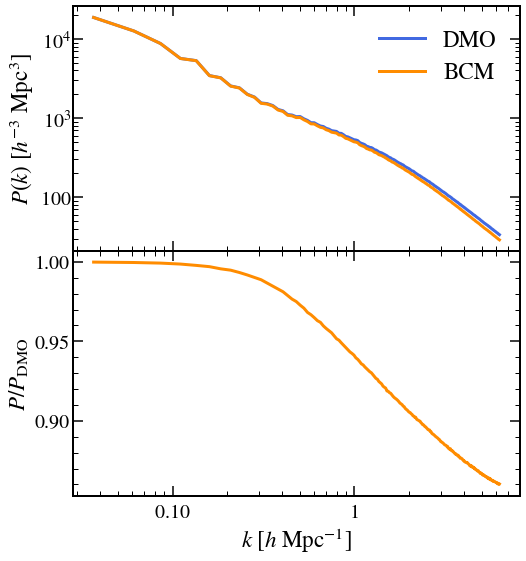

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(8, 9), sharex=True, gridspec_kw={'hspace': 0})

ax[0].loglog(dmopk['k'], dmopk['pk'], lw=3, color='royalblue', label='DMO')
ax[0].loglog(bcmpk['k'], bcmpk['pk'], lw=3, color='darkorange', label='BCM')
ax[0].legend(fontsize=23)

ax[1].semilogx(bcmpk['k'], bcmpk['pk']/dmopk['pk'], lw=3, color='darkorange')

ax[1].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
ax[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, \mathrm{Mpc}^3]$', fontsize=23)
ax[1].set_ylabel(r'$P / P_{\mathrm{DMO}}$', fontsize=23)
bacco.set_logticks(ax[0])
bacco.set_logticks(ax[1], axis='x')

plt.show()

# Measure 15 terms of lbias in DMO and BCM sims

In [71]:
# dumping scale
ds = 0.75

nsdm = int(np.cbrt(sim.header['NpartTotal']) / 4)

print('Number of sdm particles: {}'.format(nsdm))

dmobmodel = bacco.bias_model.BiasModel(sim=sim, ngrid=nsdm,
                                       npart_for_fake_sim=nsdm,
                                       mean_num_dens=0.01, # doesn't matter
                                       mode='sdm', sdm=True,
                                       damping_scale=ds)
dmopij = dmobmodel.compute_power_terms(kmin=kmin, kmax=kmax, nbins=nbins, log_binning=log_binning)

2024-02-01 20:54:31,745 bacco.BiasModel : Initialising Bias Model class ...


Number of sdm particles: 192


2024-02-01 20:54:31,960 bacco.BiasModel : Computing power spectra of bias terms ...
2024-02-01 20:54:31,961 bacco.BiasModel : Memory used: 4.486889472 Gigabytes
2024-02-01 20:54:31,961 bacco.BiasModel : Computing bias model power spectra...
2024-02-01 20:54:31,962 bacco.BiasModel : 0.9990212338420196
2024-02-01 20:54:31,962 bacco.BiasModel : -----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------
2024-02-01 20:54:31,963 bacco.BiasModel : Computing bias terms in lagrangian space and moving to Eulerian ...
2024-02-01 20:54:31,964 bacco.BiasModel : Computing expansion bias terms in eulerian coords ...
2024-02-01 20:54:31,965 bacco

bacco.lss_scaler : 288 P(k) values; Di = (0.999481, 0.998948, 0.998444, 0.998444); nthreads =48; seed =-406168 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =-406168 ngrid=192 pkfixed=1 phase=0.000000, phase_type=0; precision=single 


2024-02-01 20:54:47,094 bacco.BiasModel : ifft
2024-02-01 20:54:48,808 bacco.BiasModel : Computing laplacian ...
2024-02-01 20:54:48,810 bacco.BiasModel : Memory used: 4.754907136 Gigabytes
2024-02-01 20:58:57,598 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-02-01 20:58:57,600 bacco.BiasModel : Memory used: 4.7927296 Gigabytes
2024-02-01 20:58:57,615 bacco.BiasModel : Computing delta squared ...
2024-02-01 20:58:57,615 bacco.BiasModel : Memory used: 4.7927296 Gigabytes
2024-02-01 20:58:57,670 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-02-01 20:58:57,671 bacco.BiasModel : Memory used: 4.82103296 Gigabytes
2024-02-01 20:58:58,265 bacco.BiasModel : Transforming to eulerian coords ...
2024-02-01 20:58:58,267 bacco.BiasModel : Memory used: 4.608393216 Gigabytes
2024-02-01 20:58:58,268 bacco.BiasModel : Finding indices from lagrangian neighbours ...
2024-02-01 20:58:58,269 bacco.BiasModel : Memory used: 4.608393216 Gigabytes
2024-02

bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb


2024-02-01 20:59:04,758 bacco.statistics :  mesh done in 0.0787 s
2024-02-01 20:59:04,760 bacco.BiasModel : mesh #4
2024-02-01 20:59:04,761 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-01 20:59:04,761 bacco.statistics : starting deposit 1
2024-02-01 20:59:04,819 bacco.statistics :  mesh done in 0.0582 s
2024-02-01 20:59:04,848 bacco.BiasModel : Finished computing bias terms in lagrangian space and moving to Eulerian.
2024-02-01 20:59:04,849 bacco.BiasModel : Defining prod...
2024-02-01 20:59:04,850 bacco.BiasModel : np.arange(bias_terms_eul.shape[0]) = [0 1 2 3 4]


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)


2024-02-01 20:59:07,967 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.184965 sec
bacco.power : Counting modes


2024-02-01 20:59:11,142 bacco.statistics :  ...done in 3.17 s
2024-02-01 20:59:11,193 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.842945 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004326 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 1.12644e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.137243 sec
bacco.power : Counting modes


2024-02-01 20:59:14,409 bacco.statistics :  ...done in 3.22 s
2024-02-01 20:59:14,432 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.947961 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006320 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -4.65895e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.160111 sec
bacco.power : Counting modes


2024-02-01 20:59:17,304 bacco.statistics :  ...done in 2.87 s
2024-02-01 20:59:17,323 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.637840 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006283 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -2.69199e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.169929 sec
bacco.power : Counting modes


2024-02-01 20:59:20,306 bacco.statistics :  ...done in 2.98 s
2024-02-01 20:59:20,332 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.748701 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004088 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -1.23017e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.089049 sec
bacco.power : Counting modes


2024-02-01 20:59:23,321 bacco.statistics :  ...done in 2.99 s
2024-02-01 20:59:23,350 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.785920 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005588 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.12644e-09 (grid1) 1.12644e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166559 sec
bacco.power : Counting modes


2024-02-01 20:59:26,211 bacco.statistics :  ...done in 2.86 s
2024-02-01 20:59:26,240 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.620543 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005293 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.12644e-09 (grid1) -4.65895e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.169127 sec
bacco.power : Counting modes


2024-02-01 20:59:29,057 bacco.statistics :  ...done in 2.82 s
2024-02-01 20:59:29,093 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.565845 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003386 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.12644e-09 (grid1) -2.69199e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.163489 sec
bacco.power : Counting modes


2024-02-01 20:59:31,897 bacco.statistics :  ...done in 2.8 s
2024-02-01 20:59:31,927 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.579695 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004123 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.12644e-09 (grid1) -1.23017e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.162631 sec
bacco.power : Counting modes


2024-02-01 20:59:34,691 bacco.statistics :  ...done in 2.76 s
2024-02-01 20:59:34,711 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.536435 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004068 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.65895e-07 (grid1) -4.65895e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.093105 sec
bacco.power : Counting modes


2024-02-01 20:59:37,521 bacco.statistics :  ...done in 2.81 s
2024-02-01 20:59:37,536 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.637556 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004797 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.65895e-07 (grid1) -2.69199e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.169210 sec
bacco.power : Counting modes


2024-02-01 20:59:40,443 bacco.statistics :  ...done in 2.91 s
2024-02-01 20:59:40,467 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.652044 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003596 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=0 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.65895e-07 (grid1) -1.23017e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.163717 sec
bacco.power : Counting modes


2024-02-01 20:59:43,370 bacco.statistics :  ...done in 2.9 s
2024-02-01 20:59:43,391 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.665824 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004680 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.69199e-07 (grid1) -2.69199e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.155116 sec
bacco.power : Counting modes


2024-02-01 20:59:46,390 bacco.statistics :  ...done in 3.0 s
2024-02-01 20:59:46,411 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.782034 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003977 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.69199e-07 (grid1) -1.23017e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.160507 sec
bacco.power : Counting modes


2024-02-01 20:59:49,204 bacco.statistics :  ...done in 2.79 s
2024-02-01 20:59:49,218 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.559762 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005771 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.23017e-10 (grid1) -1.23017e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166266 sec
bacco.power : Counting modes


2024-02-01 20:59:52,174 bacco.statistics :  ...done in 2.96 s
2024-02-01 20:59:52,175 bacco.BiasModel : Done computing power spectra terms.


bacco.power : done counting modes in 2.703176 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005469 secs
bacco.power : Deallocating arrays


In [72]:
bcmbmodel = bacco.bias_model.BiasModel(sim=bcmsim.BaryonSimulation, ngrid=nsdm,
                                       npart_for_fake_sim=nsdm,
                                       mean_num_dens=0.01, # doesn't matter
                                       mode='sdm', sdm=True,
                                       damping_scale=ds)
bcmpij = bcmbmodel.compute_power_terms(kmin=kmin, kmax=kmax, nbins=nbins, log_binning=log_binning)

2024-02-01 20:59:52,190 bacco.BiasModel : Initialising Bias Model class ...
2024-02-01 20:59:52,774 bacco.BiasModel : Computing power spectra of bias terms ...
2024-02-01 20:59:52,776 bacco.BiasModel : Memory used: 4.532207616 Gigabytes
2024-02-01 20:59:52,777 bacco.BiasModel : Computing bias model power spectra...
2024-02-01 20:59:52,777 bacco.BiasModel : 0.9990212338420196
2024-02-01 20:59:52,778 bacco.BiasModel : -----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.265, Omega_b = 0.05, Omega_de = 0.685, 
Hubble=0.6, Sigma_8=0.9, A_s=None, ns=1.01, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1.0, wa=0.0
- Power Spectrum: CAMB,   Expansion Factor: 0.9990212338420196,   ReNormalizeInputSpectrum: (False,)
-----------------------------------------------
2024-02-01 20:59:52,778 bacco.BiasModel : Computing bias terms in lagrangian space and moving to Eulerian ...
2024-02-01 20:59:52,779 bacco.BiasModel : Computi

bacco.lss_scaler : 288 P(k) values; Di = (0.999481, 0.998948, 0.998444, 0.998444); nthreads =48; seed =-406168 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =-406168 ngrid=192 pkfixed=1 phase=0.000000, phase_type=0; precision=single 


2024-02-01 21:04:10,154 bacco.BiasModel : ifft
2024-02-01 21:04:11,760 bacco.BiasModel : Computing laplacian ...
2024-02-01 21:04:11,762 bacco.BiasModel : Memory used: 4.786425856 Gigabytes
2024-02-01 21:06:25,572 bacco.BiasModel : Computing bias terms in lagrangian coords ...
2024-02-01 21:06:25,574 bacco.BiasModel : Memory used: 4.78701568 Gigabytes
2024-02-01 21:06:25,584 bacco.BiasModel : Computing delta squared ...
2024-02-01 21:06:25,585 bacco.BiasModel : Memory used: 4.78701568 Gigabytes
2024-02-01 21:06:25,628 bacco.BiasModel : Computing tidal component G2 with the given tidal field
2024-02-01 21:06:25,630 bacco.BiasModel : Memory used: 4.78701568 Gigabytes
2024-02-01 21:06:26,154 bacco.BiasModel : Transforming to eulerian coords ...
2024-02-01 21:06:26,155 bacco.BiasModel : Memory used: 4.532207616 Gigabytes
2024-02-01 21:06:26,156 bacco.BiasModel : Finding indices from lagrangian neighbours ...
2024-02-01 21:06:26,157 bacco.BiasModel : Memory used: 4.532207616 Gigabytes
2024-

bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb


2024-02-01 21:06:31,823 bacco.statistics :  mesh done in 0.0585 s
2024-02-01 21:06:31,825 bacco.BiasModel : mesh #4
2024-02-01 21:06:31,825 bacco.statistics : Computing cic mesh with ngrid=192 and interlacing=False
2024-02-01 21:06:31,826 bacco.statistics : starting deposit 1
2024-02-01 21:06:31,884 bacco.statistics :  mesh done in 0.0585 s
2024-02-01 21:06:31,885 bacco.BiasModel : Finished computing bias terms in lagrangian space and moving to Eulerian.
2024-02-01 21:06:31,885 bacco.BiasModel : Defining prod...
2024-02-01 21:06:31,887 bacco.BiasModel : np.arange(bias_terms_eul.shape[0]) = [0 1 2 3 4]


bacco.mesh : binning of 7077888 particles (7077888 with mass)
bacco.mesh : boxsize=256.000000 ngrid=192, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 27.0 Mb
bacco.mesh : binning of 7077888 particles (7077888 with mass)


2024-02-01 21:06:34,871 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 1 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.179391 sec
bacco.power : Counting modes


2024-02-01 21:06:37,935 bacco.statistics :  ...done in 3.06 s
2024-02-01 21:06:37,951 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.818575 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.002917 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) 3.7028e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.168426 sec
bacco.power : Counting modes


2024-02-01 21:06:40,815 bacco.statistics :  ...done in 2.86 s
2024-02-01 21:06:40,833 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.613148 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005711 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -4.58797e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166063 sec
bacco.power : Counting modes


2024-02-01 21:06:43,946 bacco.statistics :  ...done in 3.11 s
2024-02-01 21:06:43,967 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.887880 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004964 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -2.68671e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.163910 sec
bacco.power : Counting modes


2024-02-01 21:06:46,783 bacco.statistics :  ...done in 2.82 s
2024-02-01 21:06:46,807 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.582996 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005729 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1 (grid1) -1.57296e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.168269 sec
bacco.power : Counting modes


2024-02-01 21:06:49,652 bacco.statistics :  ...done in 2.85 s
2024-02-01 21:06:49,689 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.621229 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004567 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.7028e-09 (grid1) 3.7028e-09 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.167378 sec
bacco.power : Counting modes


2024-02-01 21:06:52,583 bacco.statistics :  ...done in 2.89 s
2024-02-01 21:06:52,604 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.650567 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003320 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.7028e-09 (grid1) -4.58797e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.171762 sec
bacco.power : Counting modes


2024-02-01 21:06:55,617 bacco.statistics :  ...done in 3.01 s
2024-02-01 21:06:55,642 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.769212 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004481 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.7028e-09 (grid1) -2.68671e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.162177 sec
bacco.power : Counting modes


2024-02-01 21:06:58,643 bacco.statistics :  ...done in 3.0 s
2024-02-01 21:06:58,664 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.727720 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005763 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.7028e-09 (grid1) -1.57296e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.168137 sec
bacco.power : Counting modes


2024-02-01 21:07:01,786 bacco.statistics :  ...done in 3.12 s
2024-02-01 21:07:01,808 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.864796 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.006296 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.58797e-07 (grid1) -4.58797e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.168474 sec
bacco.power : Counting modes


2024-02-01 21:07:04,665 bacco.statistics :  ...done in 2.86 s
2024-02-01 21:07:04,685 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.591112 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005568 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.58797e-07 (grid1) -2.68671e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.166098 sec
bacco.power : Counting modes


2024-02-01 21:07:07,559 bacco.statistics :  ...done in 2.87 s
2024-02-01 21:07:07,575 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.628699 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005548 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=0 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -4.58797e-07 (grid1) -1.57296e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.164508 sec
bacco.power : Counting modes


2024-02-01 21:07:10,546 bacco.statistics :  ...done in 2.97 s
2024-02-01 21:07:10,565 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.723750 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.003083 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.68671e-07 (grid1) -2.68671e-07 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.154850 sec
bacco.power : Counting modes


2024-02-01 21:07:13,428 bacco.statistics :  ...done in 2.86 s
2024-02-01 21:07:13,447 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.652268 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.004767 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=0); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -2.68671e-07 (grid1) -1.57296e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.156204 sec
bacco.power : Counting modes


2024-02-01 21:07:16,259 bacco.statistics :  ...done in 2.81 s
2024-02-01 21:07:16,274 bacco.statistics : Computing the power spectrum with ngrid=192 and interlacing=False


bacco.power : done counting modes in 2.587253 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005836 secs
bacco.power : Deallocating arrays
bacco.power : boxsize 256.000000; ngrid 192; nthreads 48; interlacing 0; deposit_method 1; log_binning 0; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass -1.57296e-10 (grid1) -1.57296e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.161717 sec
bacco.power : Counting modes


2024-02-01 21:07:19,158 bacco.statistics :  ...done in 2.88 s
2024-02-01 21:07:19,159 bacco.BiasModel : Done computing power spectra terms.


bacco.power : done counting modes in 2.631964 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.005753 secs
bacco.power : Deallocating arrays


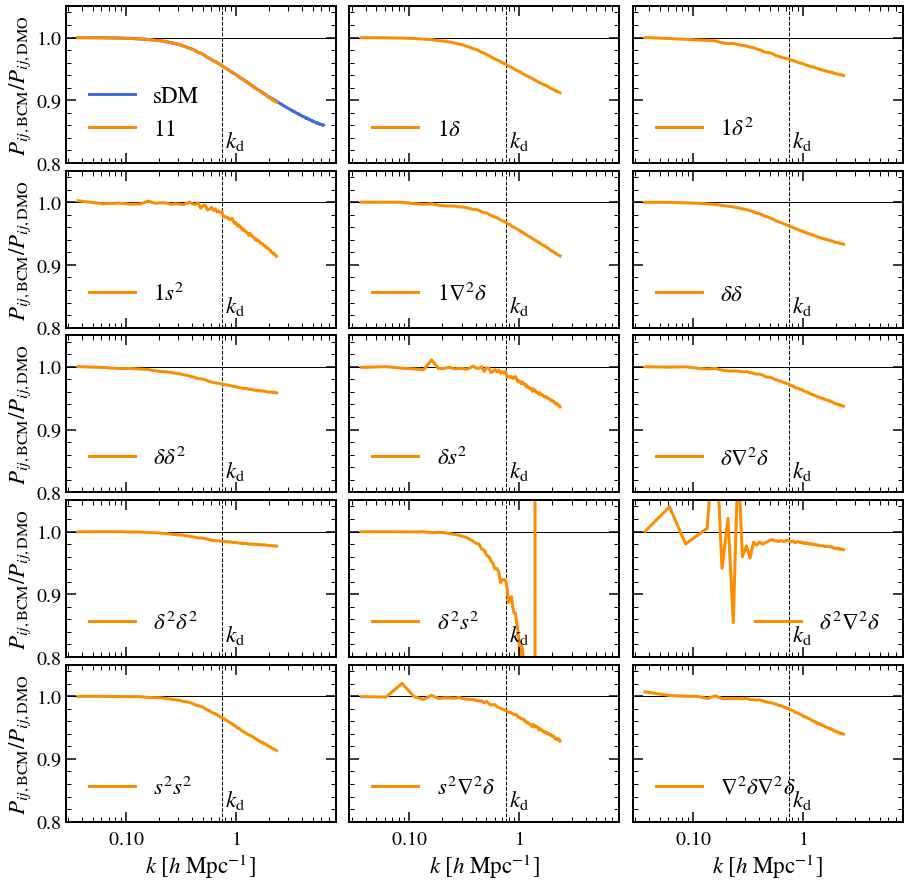

In [73]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

ax = ax.flatten()

labels = [r'$1 1$', r'$1 \delta$', r'$1 \delta^2$', r'$1 s^2$', r'$ 1 \nabla^2\delta$',
          r'$\delta \delta$', r'$\delta \delta^2$', r'$\delta s^2$', r'$\delta \nabla^2\delta$',
          r'$\delta^2 \delta^2$', r'$\delta^2 s^2$', r'$\delta^2 \nabla^2\delta$',  r'$s^2 s^2$',
          r'$s^2 \nabla^2\delta$', r'$\nabla^2\delta \nabla^2\delta$']

for i in range(15):
    ax[i].axhline(1, color='k', lw=1)
    ax[i].axvline(ds, color='k', lw=1, ls='--')
    if i == 0:
        ax[i].semilogx(dmopk['k'], bcmpk['pk'] / dmopk['pk'], lw=3, color='royalblue', label='sDM')
    mask = bcmpij[i]['k'] < np.pi * nsdm / sim.header['BoxSize']
    ax[i].semilogx(bcmpij[i]['k'][mask], bcmpij[i]['pk'][mask] / dmopij[i]['pk'][mask], lw=3, color='darkorange', label=labels[i])
    ax[i].legend(fontsize=23)
    ax[i].set_ylim(0.8, 1.05)
    ax[i].text(ds + 0.05, 0.825, r'$k_{\rm d}$', fontsize=23)
    if i % 3 == 0:
        ax[i].set_ylabel(r'$P_{ij, \mathrm{BCM}} / P_{ij, \mathrm{DMO}}$', fontsize=23)
    if i >= 12:
        ax[i].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
        bacco.set_logticks(ax[i], axis='x')

plt.show()

# Compare combination with same bias parameters but for $b_{\nabla}$
This should indicate if we can absorb the full effect of baryons in the laplacian bias parameter.

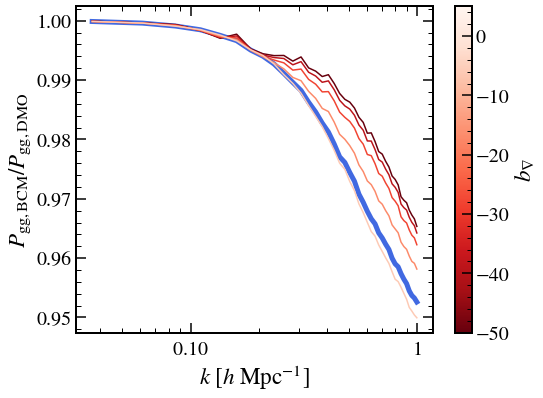

In [83]:
def combine(biasvec, pnn):
    import itertools
    biasvec = np.concatenate([[1], biasvec])
    prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))
    pgg = 0
    for i in range(15):
        fac = 2 if prod[i, 0] != prod[i, 1] else 1
        pgg += fac * biasvec[prod[i, 0]] * biasvec[prod[i, 1]] * pnn[i]['pk']
    return pgg

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

biases = [1, 0.2, 0.2, 1]
dmopgg = combine(biases, dmopij)
bcmpgg = combine(biases, bcmpij)
k = dmopij[0]['k']

mask = k < 1
ax.semilogx(k[mask], bcmpgg[mask] / dmopgg[mask], lw=5, color='royalblue')

blaps = np.linspace(-50, 5, 5)
for ib, blap in enumerate(blaps):
    biases = [1, 0.2, 0.2, blap]
    dmopgg = combine(biases, dmopij)
    bcmpgg = combine(biases, bcmpij)
    k = dmopij[0]['k']

    cc = plt.cm.Reds_r(ib / len(blaps))
    mask = k < 1
    ax.semilogx(k[mask], bcmpgg[mask] / dmopgg[mask], lw=1.5, color=cc)

ax.set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P_{\rm gg, \mathrm{BCM}} / P_{\rm gg, \mathrm{DMO}}$', fontsize=23)
bacco.set_logticks(ax, axis='x')

cb = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-50, vmax=5), cmap=plt.cm.Reds_r), ax=ax)
cb.ax.set_ylabel(r'$b_{\nabla}$', fontsize=23)

plt.show()